In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, VotingClassifier, StackingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import SCORERS, accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve, confusion_matrix

# Import Data

## Read Data

Reading and importing data for training and evaluation

In [2]:
X = pd.read_csv('X.csv')
X = X.set_index('ID')
y = pd.read_csv('y.csv')
y = y.set_index('ID')

## Create Train and Test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12626, 13)
(3157, 13)
(12626, 1)
(3157, 1)


## Scale Data

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)

# Define And Train Models (Using Best Hyper Paramters)

## Base Models

### LR

In [5]:
LR = LogisticRegression(C=1, solver='newton-cg', penalty='l2',n_jobs=-1)
LR.fit(X_train, y_train)
LR_pred_train = LR.predict(X_train)
LR_pred_test = LR.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### DT

In [6]:
DT = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=10,
    min_samples_leaf=2, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0,ccp_alpha=0)
DT.fit(X_train, y_train)
DT_pred_train = DT.predict(X_train)
DT_pred_test = DT.predict(X_test)

### RF

In [7]:
RF = RandomForestClassifier(n_estimators=1000,criterion='entropy', max_depth=10, min_samples_split=10,
    min_samples_leaf=2, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0,ccp_alpha=0, 
    bootstrap=True, oob_score=False, warm_start=True, class_weight='balanced', n_jobs=-1)
RF.fit(X_train, y_train)
RF_pred_train = RF.predict(X_train)
RF_pred_test = RF.predict(X_test)

C:\Users\Hybrid\AppData\Local\Temp/ipykernel_10956/3227627678.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF.fit(X_train, y_train)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


### SVM

In [8]:
SVM = SVC(C=1, kernel='linear', degree=5, gamma='auto', probability=True, 
    cache_size=1000, class_weight='balanced')
SVM.fit(X_train, y_train)
SVM_pred_train = SVM.predict(X_train)
SVM_pred_test = SVM.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### GNB

In [9]:
GNB = GaussianNB(var_smoothing=1)
GNB.fit(X_train, y_train)
GNB_pred_train = GNB.predict(X_train)
GNB_pred_test = GNB.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### MNB

In [10]:
MNB = MultinomialNB(alpha=1e-4, fit_prior=True)
MNB.fit(X_train, y_train)
MNB_pred_train = MNB.predict(X_train)
MNB_pred_test = MNB.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### KNN

In [12]:
KNN = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='ball_tree', 
        leaf_size=30, p=1, metric='minkowski', n_jobs=-1)
KNN.fit(X_train, y_train)
KNN_pred_train = KNN.predict(X_train)
KNN_pred_test = KNN.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Ensemble Methods

### Base Models For Ensemble Methods

Define base models with hyper paramteres acquired from previous section which resulted in best scores, in hope to achieve the best possible results in ensemble methods as well

In [13]:
LR = LogisticRegression(C=1, solver='newton-cg', penalty='l2',n_jobs=-1)

In [14]:
DT = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=10, min_samples_split=10,
    min_samples_leaf=2, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0,ccp_alpha=0)

In [15]:
RF = RandomForestClassifier(n_estimators=1000,criterion='entropy', max_depth=10, min_samples_split=10,
    min_samples_leaf=2, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0,ccp_alpha=0, 
    bootstrap=True, oob_score=False, warm_start=True, class_weight='balanced', n_jobs=-1)

In [16]:
SVM = SVC(C=1, kernel='linear', degree=5, gamma='auto', probability=True, 
                            cache_size=1000, class_weight='balanced')

In [17]:
GNB = GaussianNB(var_smoothing=1)

In [18]:
MNB = MultinomialNB(alpha=1e-4, fit_prior=True)

In [19]:
KNN = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='ball_tree', 
        leaf_size=30, p=1, metric='minkowski', n_jobs=-1)

### Adaboost

In [20]:
LR_Ada = AdaBoostClassifier(base_estimator=LR, n_estimators=100, algorithm='SAMME.R', learning_rate=1)
LR_Ada.fit(X_train, y_train)
LR_Ada_pred_train = LR_Ada.predict(X_train)
LR_Ada_pred_test = LR_Ada.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [21]:
DT_Ada = AdaBoostClassifier(base_estimator=DT, n_estimators=100, algorithm='SAMME', learning_rate=0.001)
DT_Ada.fit(X_train, y_train)
DT_Ada_pred_train = DT_Ada.predict(X_train)
DT_Ada_pred_test = DT_Ada.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
RF_Ada = AdaBoostClassifier(base_estimator=RF, n_estimators=1, algorithm='SAMME', learning_rate=1)
RF_Ada.fit(X_train, y_train)
RF_Ada_pred_train = RF_Ada.predict(X_train)
RF_Ada_pred_test = RF_Ada.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:587: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  warn('class_weight presets "balanced" or '


In [23]:
SVM_Ada = AdaBoostClassifier(base_estimator=SVM, n_estimators=10, algorithm='SAMME.R', learning_rate=0.1)
SVM_Ada.fit(X_train, y_train)
SVM_Ada_pred_train = SVM_Ada.predict(X_train)
SVM_Ada_pred_test = SVM_Ada.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [24]:
GNB_Ada = AdaBoostClassifier(base_estimator=GNB, n_estimators=10, algorithm='SAMME.R', learning_rate=0.1)
GNB_Ada.fit(X_train, y_train)
GNB_Ada_pred_train = GNB_Ada.predict(X_train)
GNB_Ada_pred_test = GNB_Ada.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [25]:
MNB_Ada = AdaBoostClassifier(base_estimator=MNB, n_estimators=1000, algorithm='SAMME', learning_rate=0.001)
MNB_Ada.fit(X_train, y_train)
MNB_Ada_pred_train = MNB_Ada.predict(X_train)
MNB_Ada_pred_test = MNB_Ada.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


As mentioned earlier KNN is incompatible with Adaboost

### XGBoost

In [26]:
XGB = XGBClassifier(n_estimators=1000, max_depth=100000, learning_rate=0.001, booster='gbtree', tree_method='approx', 
gamma=1, min_child_weight=0.1, max_delta_step=1, reg_alpha=1, reg_lambda=1)
XGB.fit(X_train, y_train)
XGB_pred_train = XGB.predict(X_train)
XGB_pred_test = XGB.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[21:15:20] WARNING: D:\bld\xgboost-split_1643227225381\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


### Bagging

In [27]:
LR_Bag = BaggingClassifier(base_estimator=LR, n_estimators=100, max_samples=7, max_features=0.7, bootstrap=True,
    bootstrap_features=False, oob_score=False, warm_start=True, n_jobs=-1)
LR_Bag.fit(X_train, y_train)
LR_Bag_pred_train = LR_Bag.predict(X_train)
LR_Bag_pred_test = LR_Bag.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
DT_Bag = BaggingClassifier(base_estimator=DT, n_estimators=100, max_samples=7, max_features=1, bootstrap=False,
    bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=-1)
DT_Bag.fit(X_train, y_train)
DT_Bag_pred_train = DT_Bag.predict(X_train)
DT_Bag_pred_test = DT_Bag.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [29]:
RF_Bag = BaggingClassifier(base_estimator=RF, n_estimators=10, max_samples=5, max_features=1, bootstrap=True,
    bootstrap_features=False, oob_score=False, warm_start=True, n_jobs=-1)
RF_Bag.fit(X_train, y_train)
RF_Bag_pred_train = RF_Bag.predict(X_train)
RF_Bag_pred_test = RF_Bag.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVM is incompatible with Bagging

GNB is incompatible with Bagging

In [30]:
MNB_Bag = BaggingClassifier(base_estimator=MNB, n_estimators=100, max_samples=5, max_features=0.5, bootstrap=True,
    bootstrap_features=True, oob_score=False, warm_start=True, n_jobs=-1)
MNB_Bag.fit(X_train, y_train)
MNB_Bag_pred_train = MNB_Bag.predict(X_train)
MNB_Bag_pred_test = MNB_Bag.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


KNN is incompatible with Bagging

### Voting

In [31]:
estimators = [('LR', LR), ('DT', DT), ('RF', RF), ('SVM', SVM), ('GNB', GNB), ('MNB', MNB), ('KNN', KNN)]

In [32]:
VT = VotingClassifier(estimators=estimators, voting='soft', flatten_transform=True, n_jobs=-1)
VT.fit(X_train, y_train)
VT_pred_train = VT.predict(X_train)
VT_pred_test = VT.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


# Scoring

## Base Models

In [90]:
base_list = ['LR', 'DT', 'RF', 'SVM', 'GNB', 'MNB', 'KNN']

pred_train_list = [LR_pred_train, DT_pred_train, RF_pred_train, 
    SVM_pred_train, GNB_pred_train, MNB_Ada_pred_train, KNN_pred_train]

pred_test_list = [LR_pred_test, DT_pred_test, RF_pred_test, 
    SVM_pred_test, GNB_pred_test, MNB_Ada_pred_test, KNN_pred_test]

In [91]:
base_scores = []
for i in range(len(base_list)):
    
    accuracy_train = accuracy_score(y_train, pred_train_list[i])
    accuracy_test = accuracy_score(y_test, pred_test_list[i])

    f1_train = f1_score(y_train, pred_train_list[i], average='weighted')
    f1_test = f1_score(y_test, pred_test_list[i], average='weighted')

    precision_train = precision_score(y_train, pred_train_list[i], average='weighted')
    precision_test = precision_score(y_test, pred_test_list[i], average='weighted')

    recall_train = recall_score(y_train, pred_train_list[i], average='weighted')
    recall_test = recall_score(y_test, pred_test_list[i], average='weighted')

    base_scores.append([base_list[i], accuracy_train, accuracy_test,
        f1_train, f1_test, precision_train, precision_test, recall_train, recall_test])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [92]:
base_scores_df = pd.DataFrame(base_scores, columns = ['model', 'accuracy_train', 'accuracy_test', 'f1_train', 'f1_test', 'precision_train', 'precision_test', 'recall_train', 'recall_test'])
base_scores_df

,model,accuracy_train,accuracy_test,f1_train,f1_test,precision_train,precision_test,recall_train,recall_test
0,LR,0.882465,0.884067,0.879063,0.881739,0.885437,0.885426,0.882465,0.884067
1,DT,0.928877,0.914793,0.928558,0.914610,0.931618,0.916657,0.928877,0.914793
2,RF,0.931095,0.919861,0.930621,0.919352,0.939318,0.928545,0.931095,0.919861
3,SVM,0.890147,0.889769,0.890678,0.890041,0.907876,0.907150,0.890147,0.889769
4,GNB,0.794234,0.785556,0.779613,0.771697,0.785417,0.780185,0.794234,0.785556
5,MNB,0.817123,0.802661,0.812588,0.798758,0.813117,0.797840,0.817123,0.802661
6,KNN,0.993109,0.912575,0.993114,0.912560,0.993173,0.913305,0.993109,0.912575


## Ensemble Methods

In [44]:
ensemble_list = ['LR_Ada', 'DT_Ada', 'RF_Ada', 'SVM_Ada', 'GNB_Ada', 'MNB_Ada',
    'LR_Bag', 'DT_Bag', 'RF_Bag', 'MNB_Bag', 'XGBoost', 'Voting']

pred_train_list = [LR_Ada_pred_train, DT_Ada_pred_train, RF_Ada_pred_train, SVM_Ada_pred_train, GNB_Ada_pred_train, MNB_Ada_pred_train,
    LR_Bag_pred_train, DT_Bag_pred_train, RF_Bag_pred_train, MNB_Bag_pred_train, XGB_pred_train, VT_pred_train]

pred_test_list = [LR_Ada_pred_test, DT_Ada_pred_test, RF_Ada_pred_test, SVM_Ada_pred_test, GNB_Ada_pred_test, MNB_Ada_pred_test,
    LR_Bag_pred_test, DT_Bag_pred_test, RF_Bag_pred_test, MNB_Bag_pred_test, XGB_pred_test, VT_pred_test]

In [45]:
ensemble_scores = []
for i in range(len(ensemble_list)):
    
    accuracy_train = accuracy_score(y_train, pred_train_list[i])
    accuracy_test = accuracy_score(y_test, pred_test_list[i])

    f1_train = f1_score(y_train, pred_train_list[i], average='weighted')
    f1_test = f1_score(y_test, pred_test_list[i], average='weighted')

    precision_train = precision_score(y_train, pred_train_list[i], average='weighted')
    precision_test = precision_score(y_test, pred_test_list[i], average='weighted')

    recall_train = recall_score(y_train, pred_train_list[i], average='weighted')
    recall_test = recall_score(y_test, pred_test_list[i], average='weighted')

    ensemble_scores.append([ensemble_list[i], accuracy_train, accuracy_test,
        f1_train, f1_test, precision_train, precision_test, recall_train, recall_test])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedM

In [47]:
ensemble_scores_df = pd.DataFrame(ensemble_scores, columns = ['model', 'accuracy_train', 'accuracy_test', 'f1_train', 'f1_test', 'precision_train', 'precision_test', 'recall_train', 'recall_test'])
ensemble_scores_df

,model,accuracy_train,accuracy_test,f1_train,f1_test,precision_train,precision_test,recall_train,recall_test
0,LR_Ada,0.814510,0.803928,0.804280,0.793952,0.817907,0.807363,0.814510,0.803928
1,DT_Ada,0.941074,0.928413,0.940749,0.928017,0.946397,0.934123,0.941074,0.928413
2,RF_Ada,0.931095,0.921128,0.930634,0.920664,0.939299,0.929691,0.931095,0.921128
3,SVM_Ada,0.831300,0.822300,0.826060,0.816944,0.841499,0.832697,0.831300,0.822300
4,GNB_Ada,0.797719,0.790624,0.783480,0.776903,0.797066,0.785328,0.797719,0.790624
5,MNB_Ada,0.817123,0.802661,0.812588,0.798758,0.813117,0.797840,0.817123,0.802661
6,LR_Bag,0.516316,0.496991,0.410417,0.396151,0.361020,0.354721,0.516316,0.496991
7,DT_Bag,0.380406,0.365854,0.209661,0.195993,0.144708,0.133849,0.380406,0.365854
8,RF_Bag,0.292888,0.302186,0.132700,0.140251,0.085783,0.091316,0.292888,0.302186
9,MNB_Bag,0.686678,0.658853,0.661205,0.637685,0.645302,0.631461,0.686678,0.658853


# All Methods Scoring

In [140]:
feedforward_scores_df = pd.DataFrame([['FF', 0.929431,0.920811,0.928794,0.920303,0.936153,0.926805,0.929431,0.920811]], columns = ['model', 'accuracy_train', 'accuracy_test', 'f1_train', 'f1_test', 'precision_train', 'precision_test', 'recall_train', 'recall_test'])
all_scores_df = base_scores_df.append(ensemble_scores_df).append(feedforward_scores_df)
all_scores_df = all_scores_df.reset_index()
all_scores_df = all_scores_df.drop(columns=['index'])
all_scores_df

,model,accuracy_train,accuracy_test,f1_train,f1_test,precision_train,precision_test,recall_train,recall_test
0,LR,0.882465,0.884067,0.879063,0.881739,0.885437,0.885426,0.882465,0.884067
1,DT,0.928877,0.914793,0.928558,0.914610,0.931618,0.916657,0.928877,0.914793
2,RF,0.931095,0.919861,0.930621,0.919352,0.939318,0.928545,0.931095,0.919861
3,SVM,0.890147,0.889769,0.890678,0.890041,0.907876,0.907150,0.890147,0.889769
4,GNB,0.794234,0.785556,0.779613,0.771697,0.785417,0.780185,0.794234,0.785556
5,MNB,0.817123,0.802661,0.812588,0.798758,0.813117,0.797840,0.817123,0.802661
6,KNN,0.993109,0.912575,0.993114,0.912560,0.993173,0.913305,0.993109,0.912575
7,LR_Ada,0.814510,0.803928,0.804280,0.793952,0.817907,0.807363,0.814510,0.803928
8,DT_Ada,0.941074,0.928413,0.940749,0.928017,0.946397,0.934123,0.941074,0.928413
9,RF_Ada,0.931095,0.921128,0.930634,0.920664,0.939299,0.929691,0.931095,0.921128


In [141]:
all_scores_df.sort_values(by='f1_test', ascending=False)

,model,accuracy_train,accuracy_test,f1_train,f1_test,precision_train,precision_test,recall_train,recall_test
8,DT_Ada,0.941074,0.928413,0.940749,0.928017,0.946397,0.934123,0.941074,0.928413
17,XGBoost,0.949390,0.923028,0.949163,0.922855,0.951857,0.925529,0.949390,0.923028
9,RF_Ada,0.931095,0.921128,0.930634,0.920664,0.939299,0.929691,0.931095,0.921128
19,FF,0.929431,0.920811,0.928794,0.920303,0.936153,0.926805,0.929431,0.920811
2,RF,0.931095,0.919861,0.930621,0.919352,0.939318,0.928545,0.931095,0.919861
18,Voting,0.929827,0.917010,0.929236,0.916314,0.937773,0.925523,0.929827,0.917010
1,DT,0.928877,0.914793,0.928558,0.914610,0.931618,0.916657,0.928877,0.914793
6,KNN,0.993109,0.912575,0.993114,0.912560,0.993173,0.913305,0.993109,0.912575
3,SVM,0.890147,0.889769,0.890678,0.890041,0.907876,0.907150,0.890147,0.889769
0,LR,0.882465,0.884067,0.879063,0.881739,0.885437,0.885426,0.882465,0.884067


### Plot Scores

In [142]:
plot_df = all_scores_df.set_index('model').sort_values(by='f1_test')

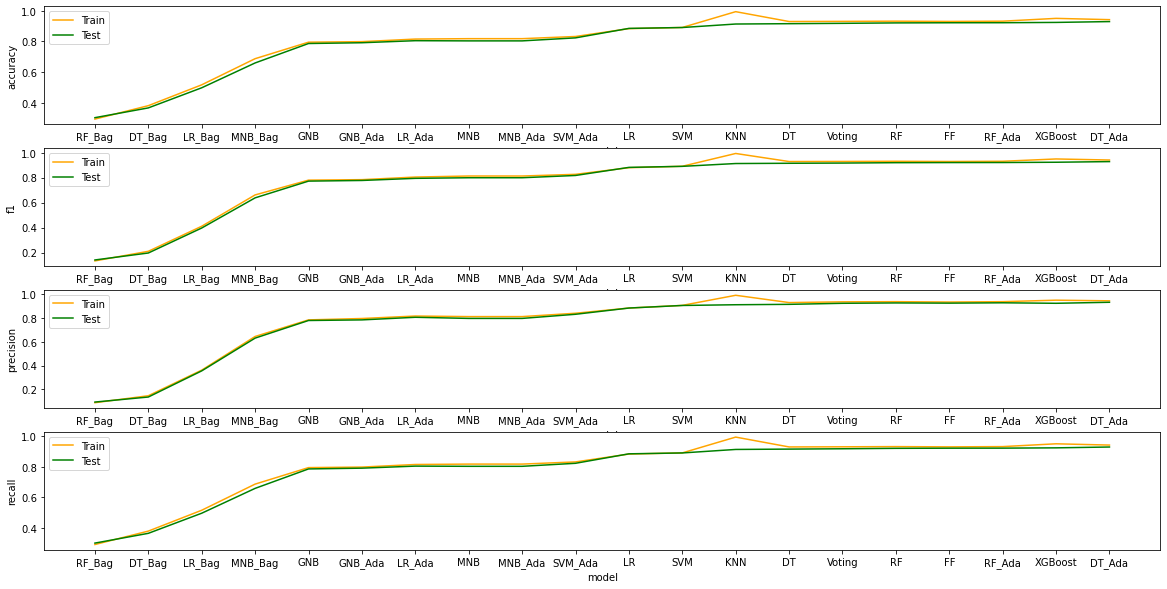

In [143]:
plt.figure(figsize=(20,10))

c=1
for i in ['accuracy', 'f1', 'precision', 'recall']:
    p = plt.subplot(4,1,c)
    
    p = sns.lineplot(x=plot_df.index, y= plot_df[i + '_train'], color='orange', legend= 'full')
    p = sns.lineplot(x=plot_df.index, y= plot_df[i + '_test'], color='green', legend='full')
    p.set_ylabel(i)
    p.legend(['Train', 'Test'])
    c +=1